In [31]:
import xarray as xr
import sys
sys.path.append("../")

In [32]:
from functions.floodmodel_utils import get_basin_mask, get_river_mask

In [70]:
#eps = xr.open_mfdataset('/tmp/flood_prediction/pipeline/glofas2.1_2018_areagrid_for_StevenGong_in_Europe_*.nc', combine="nested", concat_dim='time')
eps = xr.open_dataset('/tmp/flood_prediction/pipeline/glofas2.1_2018_areagrid_for_StevenGong_in_Europe_2013060400.nc')

In [71]:
eps = eps.rename({'lat': 'latitude'})
eps = eps.rename({'lon': 'longitude'})

eps

<xarray.Dataset>
Dimensions:    (ensemble: 11, latitude: 450, longitude: 750, time: 31)
Coordinates:
  * time       (time) datetime64[ns] 2013-06-04 2013-06-05 ... 2013-07-04
  * longitude  (longitude) float32 -24.95 -24.85 -24.75 ... 49.75 49.85 49.95
  * latitude   (latitude) float32 74.95 74.85 74.75 74.65 ... 30.25 30.15 30.05
  * ensemble   (ensemble) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0
Data variables:
    ups        (latitude, longitude) float32 ...
    ldd        (latitude, longitude) float32 ...
    rl2        (latitude, longitude) float32 ...
    rl5        (latitude, longitude) float32 ...
    rl20       (latitude, longitude) float32 ...
    dis        (time, ensemble, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/...
    history:      Fri Feb 14 21:34:47 2020: cdo -f nc4 -z zip copy tmp.nc /vo...
    Conventions:  CF-1.6
    CDO:          Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/...

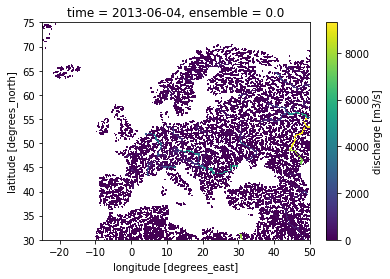

In [72]:
eps.isel(time=0, ensemble=0)['dis'].plot()

In [73]:
elbe_basin_mask = get_basin_mask(eps.isel(time=0, ensemble=0)['dis'], 'Elbe')

In [74]:
eps_masked = eps.where(elbe_basin_mask, drop=True)
eps_masked

<xarray.Dataset>
Dimensions:    (ensemble: 11, latitude: 54, longitude: 71, time: 31)
Coordinates:
  * time       (time) datetime64[ns] 2013-06-04 2013-06-05 ... 2013-07-04
  * longitude  (longitude) float32 9.25 9.35 9.45 9.55 ... 16.05 16.15 16.25
  * latitude   (latitude) float32 53.85 53.75 53.65 53.55 ... 48.75 48.65 48.55
  * ensemble   (ensemble) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0
Data variables:
    ups        (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan
    ldd        (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan
    rl2        (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan
    rl5        (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan
    rl20       (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan
    dis        (time, ensemble, latitude, longitude) float32 nan nan ... nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/...
    history:      Fri Feb 14 21:34:47 2020: cdo -f nc4 -z zip copy tmp.nc /vo...
    Conventions:  CF-1.6
    CDO:          Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/...

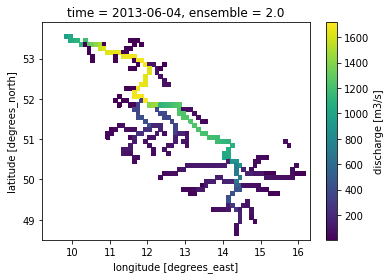

In [75]:
eps_masked.isel(time=0, ensemble=2)['dis'].plot()

In [76]:
eps_masked

<xarray.Dataset>
Dimensions:    (ensemble: 11, latitude: 54, longitude: 71, time: 31)
Coordinates:
  * time       (time) datetime64[ns] 2013-06-04 2013-06-05 ... 2013-07-04
  * longitude  (longitude) float32 9.25 9.35 9.45 9.55 ... 16.05 16.15 16.25
  * latitude   (latitude) float32 53.85 53.75 53.65 53.55 ... 48.75 48.65 48.55
  * ensemble   (ensemble) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0
Data variables:
    ups        (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan
    ldd        (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan
    rl2        (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan
    rl5        (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan
    rl20       (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan
    dis        (time, ensemble, latitude, longitude) float32 nan nan ... nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/...
    history:      Fri Feb 14 21:34:47 2020: cdo -f nc4 -z zip copy tmp.nc /vo...
    Conventions:  CF-1.6
    CDO:          Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/...

In [77]:
#instead of taking the mean you should take a specific point
mean_eps_masked = eps_masked.mean(['latitude', 'longitude'])['dis']
mean_eps_masked

<xarray.DataArray 'dis' (time: 31, ensemble: 11)>
array([[410.89667, 410.89667, 410.89667, 410.89667, 410.89667, 410.89667,
        410.89667, 410.89667, 410.89667, 410.89667, 410.89667],
       [444.0367 , 442.88672, 440.86926, 444.2797 , 443.1697 , 444.47684,
        440.60107, 441.48944, 458.78955, 440.11624, 439.4527 ],
       [426.69196, 425.54404, 422.14975, 428.56198, 425.94772, 429.62146,
        422.18033, 422.65033, 450.77042, 421.31128, 420.26837],
       [384.74005, 385.54904, 380.5551 , 388.2643 , 385.4418 , 391.23407,
        380.98087, 380.52682, 413.05743, 380.13412, 378.658  ],
       [340.08185, 344.44644, 338.1077 , 345.28824, 342.8816 , 353.09003,
        338.32788, 336.5335 , 369.11804, 338.2131 , 335.95407],
       [302.17465, 310.59418, 303.27597, 309.05386, 307.4921 , 328.2974 ,
        303.39346, 299.97006, 330.93045, 305.70932, 301.43005],
       [273.57028, 285.50162, 277.4067 , 282.05127, 286.24878, 309.00766,
        277.813  , 281.88885, 302.20462, 281.70642, 276.67914],
       [258.02292, 268.47144, 258.841  , 262.6994 , 293.3555 , 304.26553,
        259.4022 , 275.18146, 282.68542, 264.51688, 265.37155],
       [246.98624, 256.89346, 245.26566, 248.93729, 294.15173, 320.26538,
        246.33163, 270.2295 , 271.36975, 252.66527, 255.91878],
       [244.26813, 259.068  , 235.21272, 239.13815, 290.07904, 323.63608,
        236.63876, 264.8726 , 273.7471 , 243.81038, 247.21538],
       [241.60757, 264.1407 , 227.36375, 231.82124, 282.52155, 317.8643 ,
        229.4529 , 256.35745, 278.43936, 237.01091, 240.59035],
       [255.01547, 292.02625, 221.05492, 225.7223 , 269.07538, 307.27936,
        223.7663 , 246.6613 , 279.56644, 232.04822, 235.02638],
       [268.6271 , 310.2763 , 222.0379 , 220.39609, 257.60864, 292.34286,
        220.24872, 238.07864, 280.18262, 228.04161, 229.17456],
       [276.7494 , 343.3398 , 221.77141, 215.69876, 248.676  , 280.5481 ,
        217.55159, 232.02457, 282.37274, 228.6774 , 225.71762],
       [278.56357, 377.46735, 219.38722, 212.91014, 244.95029, 271.37738,
        217.56679, 227.20099, 280.18558, 237.93234, 224.37148],
       [270.86078, 392.50107, 216.51764, 211.84363, 240.85236, 264.4984 ,
        217.28323, 222.2515 , 281.06042, 247.76898, 222.6897 ],
       [260.36014, 387.43478, 211.90561, 211.18549, 235.86572, 267.46255,
        216.64099, 260.96597, 279.59344, 258.70987, 221.76118],
       [252.09169, 366.90433, 206.61102, 211.46921, 235.59648, 271.09314,
        215.34633, 295.28857, 274.46838, 261.28265, 224.61465],
       [244.41035, 343.15936, 202.30722, 211.03806, 239.5462 , 288.02545,
        212.39975, 311.66382, 268.08417, 257.04855, 228.44676],
       [236.96938, 322.08585, 198.37787, 210.60095, 242.41347, 300.86453,
        208.644  , 313.44183, 259.85336, 248.69702, 228.84473],
       [240.87006, 306.26846, 194.15881, 209.19794, 244.81995, 301.91876,
        204.7763 , 299.50653, 252.86438, 238.18835, 226.2451 ],
       [250.08437, 294.9645 , 189.99197, 206.54102, 247.30098, 294.95773,
        200.40486, 283.67465, 246.09679, 229.56616, 222.01689],
       [254.58911, 286.25262, 186.98611, 208.28911, 247.26491, 281.4568 ,
        196.06837, 268.29248, 240.26088, 222.55206, 217.08478],
       [258.78717, 279.56656, 186.00362, 208.10484, 250.73381, 265.87604,
        192.38626, 254.34038, 235.09746, 231.69412, 212.0132 ],
       [257.05557, 273.73865, 183.43759, 209.84122, 251.30798, 252.98848,
        189.55217, 242.48972, 231.44121, 244.19179, 207.28514],
       [251.02396, 275.22025, 179.62679, 211.59535, 248.80438, 245.33081,
        186.83023, 231.85736, 227.90796, 247.69647, 204.875  ],
       [243.70525, 277.58286, 175.67075, 222.12206, 247.9934 , 238.68997,
        184.15424, 222.38419, 224.38666, 246.20067, 204.02817],
       [235.53262, 277.7688 , 171.18698, 231.3291 , 245.95694, 233.61249,
        182.20964, 214.73695, 220.9686 , 239.7827 , 202.88728],
       [227.75511, 275.86737, 166.30597, 239.89052, 243.77486, 227.8972 ,
        180.

Text(0.5, 1.0, 'Comparison of LSTM Model with GloFAS 30-Day Ensemble Forecasts')

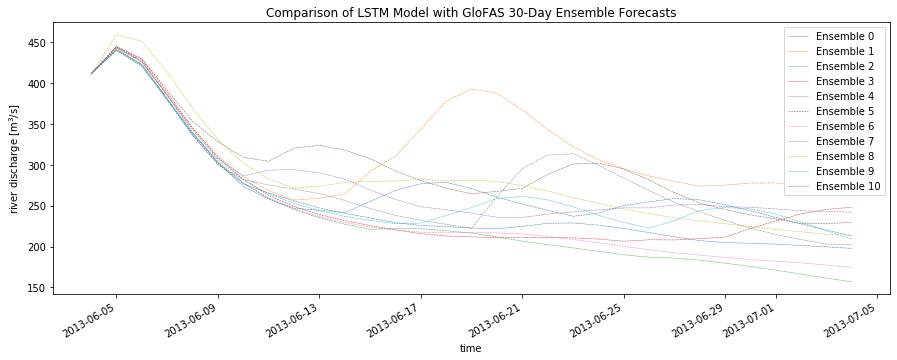

In [97]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 5))
color_scheme = ['g', 'cyan', 'magenta', 'k']

for ensemble_index in range(len(mean_eps_masked.ensemble)):
    mean_eps_masked.isel(ensemble=ensemble_index).plot(ax=ax, label=('Ensemble ' + str(ensemble_index)), lw=0.5, linestyle='--')
    
ax.set_ylabel('river discharge [m$^3$/s]')

ax.legend(loc='upper right')                

plt.title('Comparison of LSTM Model with GloFAS 30-Day Ensemble Forecasts')